In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [3]:
 forest=pd.read_csv('forestfires.csv')

In [4]:
forest.shape

(517, 31)

In [5]:
forest.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [6]:
forest.columns

Index(['month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind',
       'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu',
       'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb',
       'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov',
       'monthoct', 'monthsep', 'size_category'],
      dtype='object')

In [7]:
data=forest.copy()

In [8]:
data.drop(['month','day'],axis = 1,inplace=True)

In [9]:
le = preprocessing.LabelEncoder()
data['size_category']= le.fit_transform(data['size_category'])

In [11]:
data.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,1


In [12]:
data.size_category

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [14]:
data.size_category.value_counts()

1    378
0    139
Name: size_category, dtype: int64

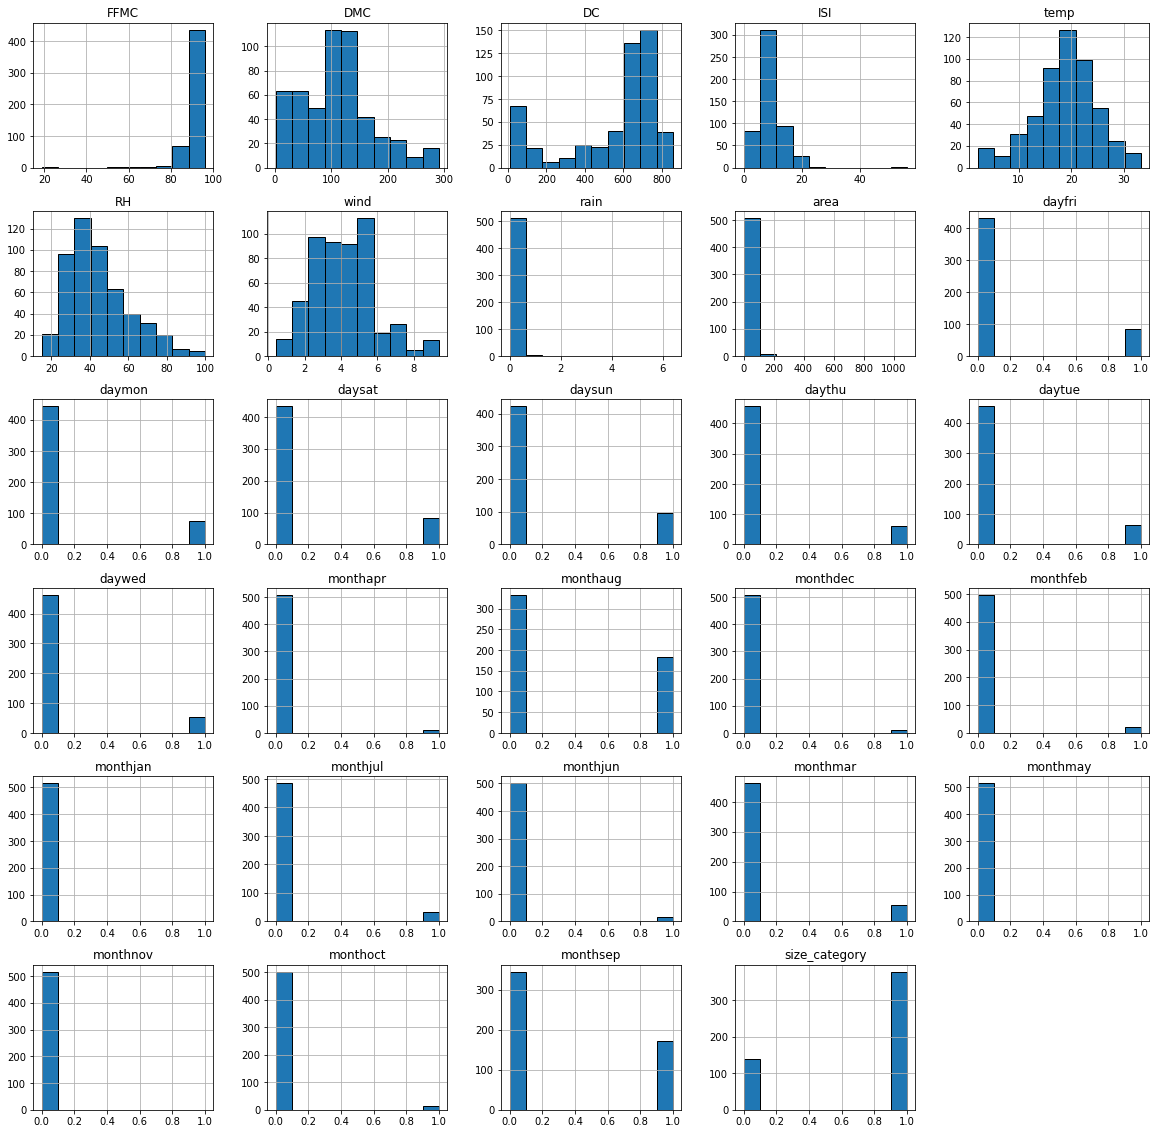

In [17]:
import seaborn as sns
data.hist(edgecolor='black',figsize=(20,20),linewidth=1) 
plt.show()

In [18]:
data.iloc[:,0:9]=StandardScaler().fit_transform(data.iloc[:,0:9])

In [19]:
data

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1,...,0,0,0,0,1,0,0,0,0,1
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,1,0,1
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,1,0,1
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1,...,0,0,0,0,1,0,0,0,0,1
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0,...,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0,...,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0,...,0,0,0,0,0,0,0,0,0,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,0,1


In [22]:
x= data.iloc[:,0:-1]
y = data.iloc[:,-1]

In [29]:
x

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
0,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.202020,1,...,0,0,0,0,0,1,0,0,0,0
1,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,1,0
2,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,1,0
3,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.202020,1,...,0,0,0,0,0,1,0,0,0,0
4,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.202020,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,-1.640083,-0.846648,0.474768,-1.563460,1.536084,-0.753800,-0.736124,-0.073268,-0.100753,0,...,0,0,0,0,0,0,0,0,0,0
513,-1.640083,-0.846648,0.474768,-1.563460,0.519019,1.638592,0.995798,-0.073268,0.651674,0,...,0,0,0,0,0,0,0,0,0,0
514,-1.640083,-0.846648,0.474768,-1.563460,0.398350,1.577248,1.498614,-0.073268,-0.026532,0,...,0,0,0,0,0,0,0,0,0,0
515,0.680957,0.549003,0.269382,0.500176,1.156839,-0.140366,-0.009834,-0.073268,-0.202020,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [33]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=42)    

In [34]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear == y_test)

0.9

In [38]:
model_linear = SVC(kernel='poly')
model_linear.fit(x_train,y_train)
pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear == y_test)

0.7846153846153846

In [40]:
model_linear = SVC(kernel = "rbf")
model_linear.fit(x_train, y_train)
pred_test_linear = model_linear.predict(x_test)

np.mean(pred_test_linear == y_test)

0.7923076923076923

In [44]:
clf = SVC()
param_grid = [{'kernel' : ['rbf'],'gamma':[50,5,10,0,5,0,1],'C':[25,22,20,18,16,15,14,13,12,11,10,0,1,0.001]}]
gsv = GridSearchCV(clf, param_grid,cv=10)
gsv.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [25, 22, 20, 18, 16, 15, 14, 13, 12, 11, 10, 0,
                                1, 0.001],
                          'gamma': [50, 5, 10, 0, 5, 0, 1],
                          'kernel': ['rbf']}])

In [45]:
gsv.best_params_,gsv.best_score_

({'C': 1, 'gamma': 50, 'kernel': 'rbf'}, 0.7365047233468286)

In [47]:
clf = SVC(C=22, gamma = 0.1)
clf.fit(x_train,y_train)
pred_y = clf.predict(x_test)

In [49]:
accuracy = accuracy_score(y_test, pred_y)*100
accuracy

89.23076923076924

In [51]:
confusion_matrix(y_test, pred_y)

array([[25, 10],
       [ 4, 91]], dtype=int64)

In [72]:
print(classification_report(y_test, pred_y))

              precision    recall  f1-score   support

           0       0.86      0.71      0.78        35
           1       0.90      0.96      0.93        95

    accuracy                           0.89       130
   macro avg       0.88      0.84      0.85       130
weighted avg       0.89      0.89      0.89       130



In [73]:
pred_y

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [75]:
a={'predicted_y':pred_y}
a

{'predicted_y': array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
        1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
        0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])}

In [77]:
n=pd.DataFrame(a)
n.head

<bound method NDFrame.head of      predicted_y
0              1
1              1
2              1
3              1
4              1
..           ...
125            1
126            0
127            1
128            1
129            0

[130 rows x 1 columns]>

In [78]:
n.predicted_y.value_counts()

1    101
0     29
Name: predicted_y, dtype: int64